<a href="https://colab.research.google.com/github/Lakshmipathyakash/analysing_customer_behaviour/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd # Make sure this cell is executed.
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


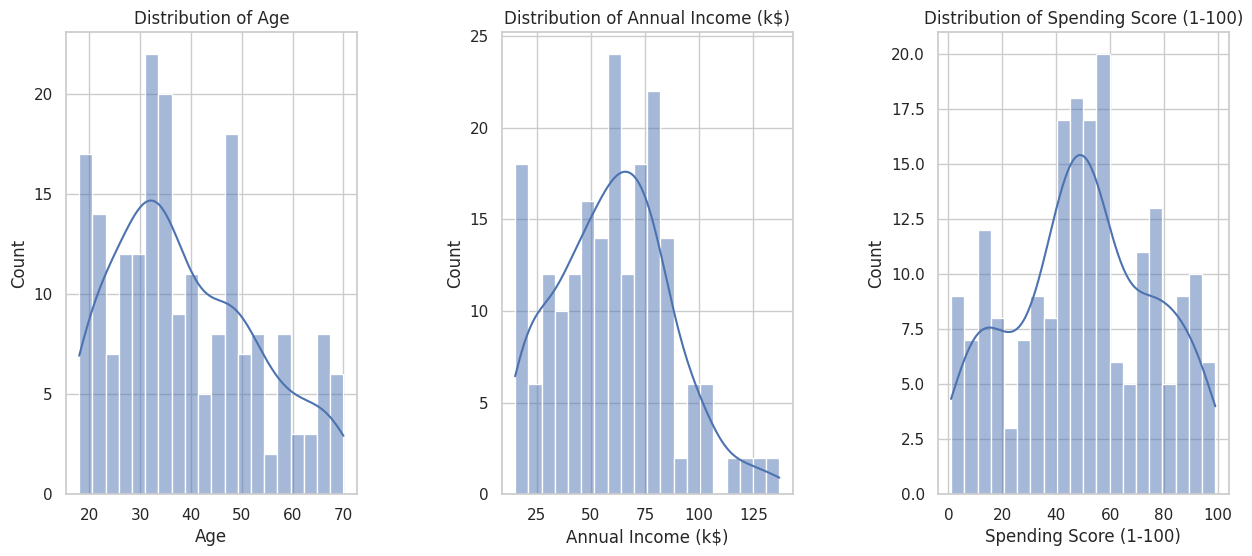

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df[x], bins=20, kde=True)  # kde=True adds the kernel density estimate similar to distplot
    plt.title('Distribution of {}'.format(x))

plt.show()


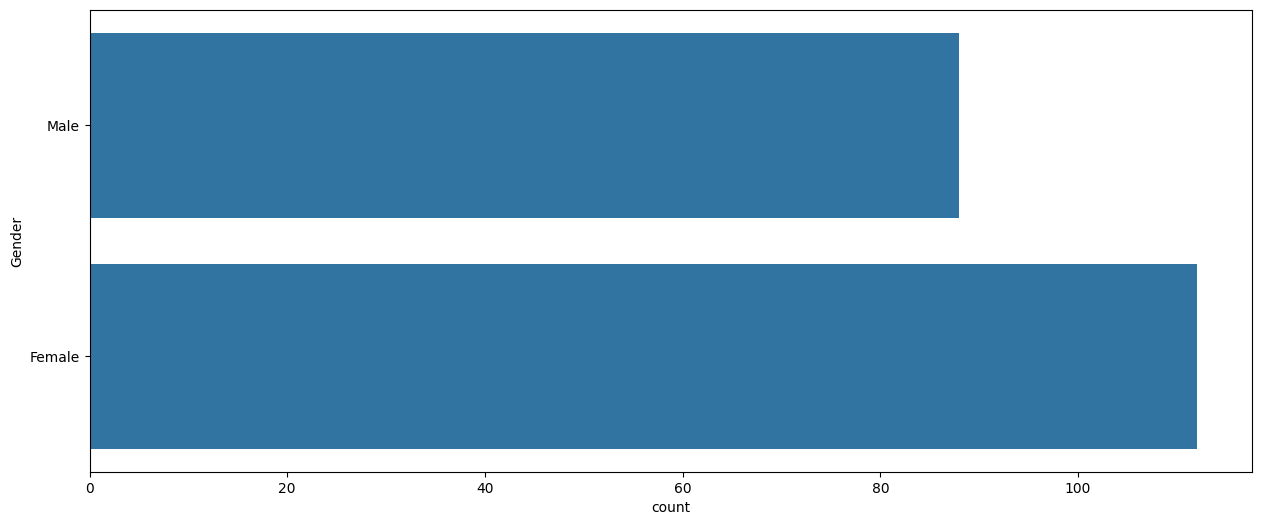

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(y='Gender',data=df)
plt.show()

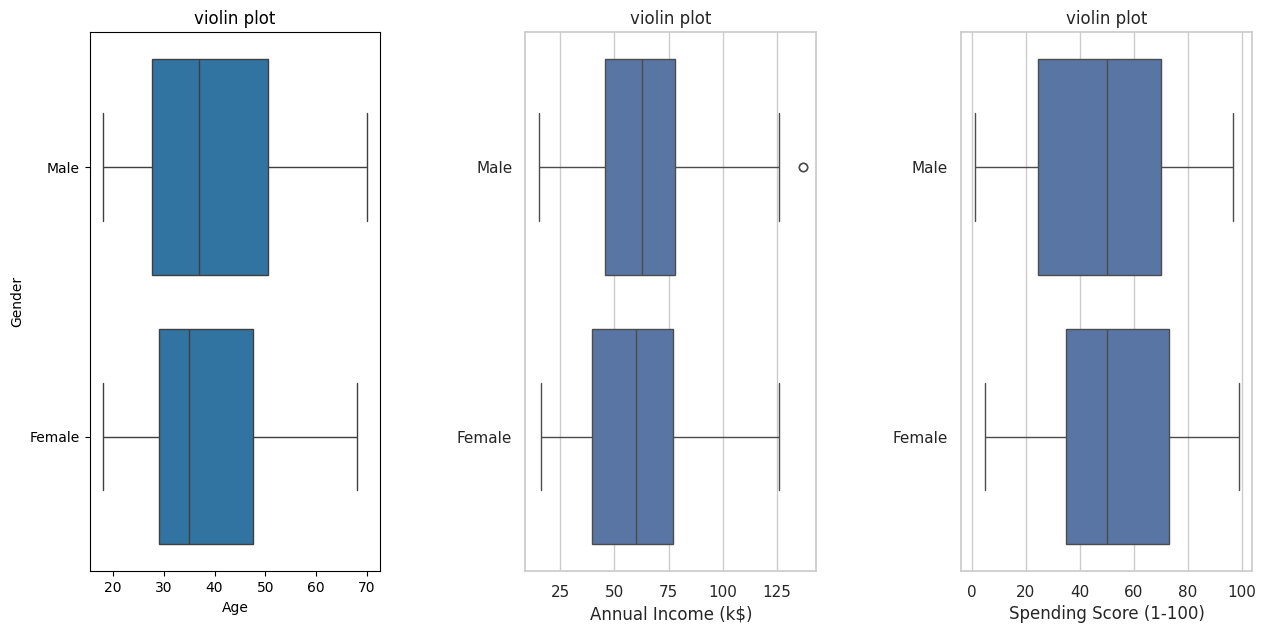

In [ ]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style='whitegrid')
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.boxplot(x=cols,y='Gender',data=df)
  plt.ylabel('Gender'if n==1 else '')
  plt.title('violin plot')
plt.show()

<ipython-input-22-a218022b6707>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")  # Corrected 'palettle' to 'palette'


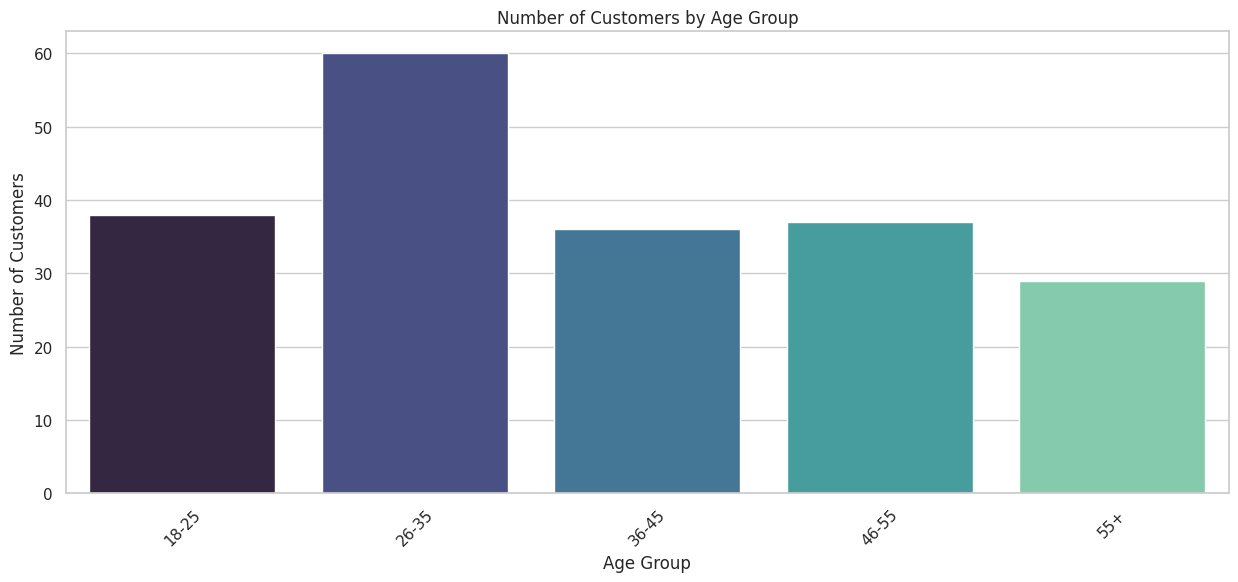

In [ ]:


# Assuming df is your DataFrame
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [
    len(age_18_25),
    len(age_26_35),
    len(age_36_45),
    len(age_46_55),
    len(age_55above)
]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")  # Corrected 'palettle' to 'palette'
plt.title("Number of Customers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()


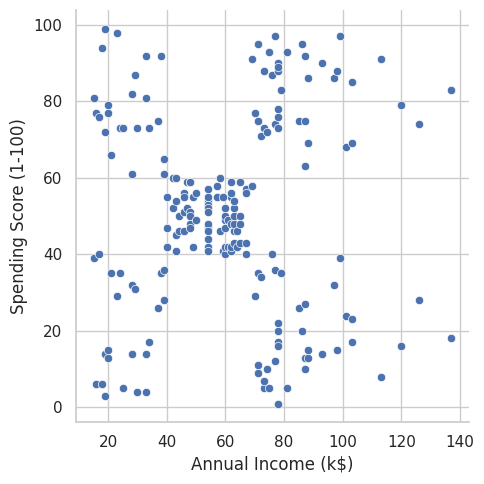

In [ ]:
sns.relplot(x="Annual Income (k$)" ,y="Spending Score (1-100)",data=df)

<ipython-input-25-56f28a2b2e29>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy,palette="rocket")


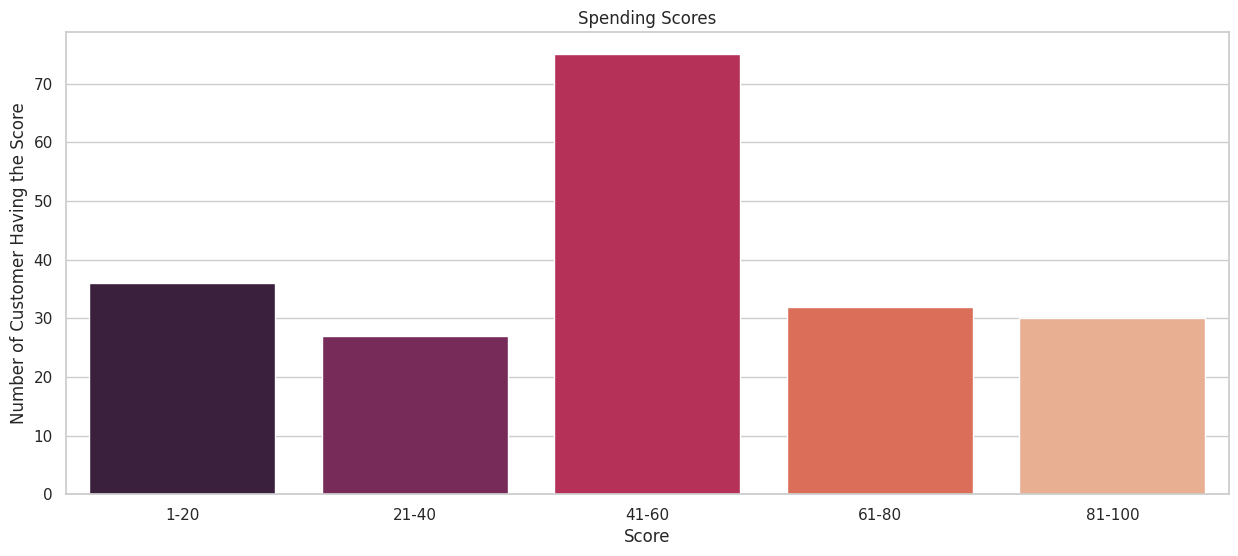

In [ ]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1)& (df["Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21)& (df["Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41)& (df["Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61)& (df["Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81)& (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40" , "41-60","61-80" , "81-100"]
ssy = [
    len(ss_1_20.values),
    len(ss_21_40.values),
    len(ss_41_60.values),
    len(ss_61_80.values),
    len(ss_81_100.values)]

plt.figure(figsize=(15,6)) # The figsize argument is used to set the figure size.
sns.barplot(x=ssx, y=ssy,palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

<ipython-input-27-7c1f31e60f9e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy,palette="Spectral")


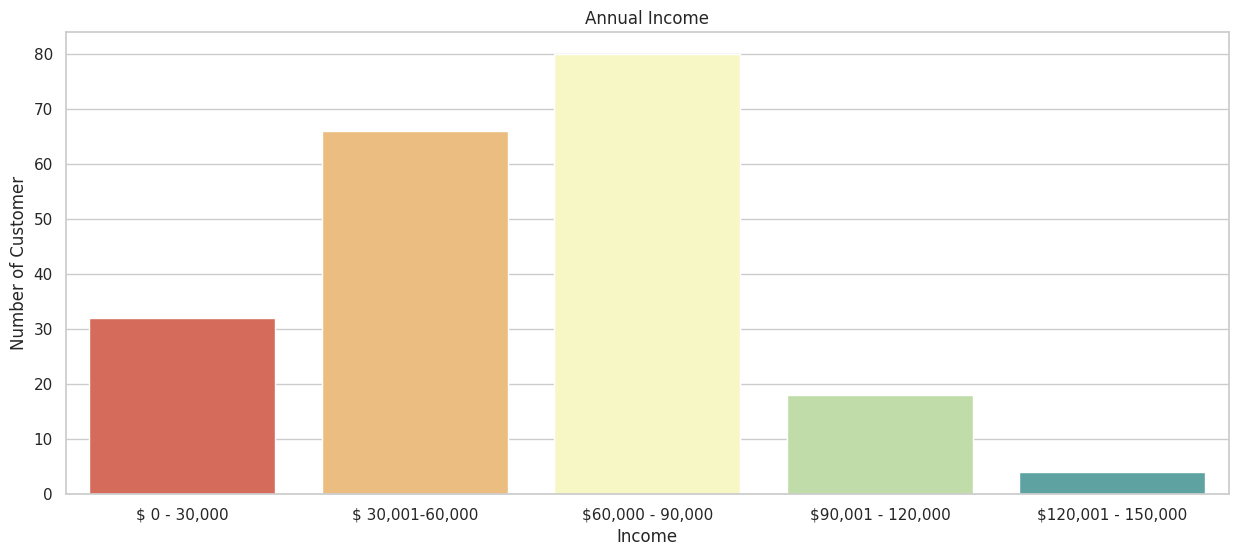

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0)& (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31)& (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61)& (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91)& (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121)& (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001-60,000","$60,000 - 90,000" , "$90,001 - 120,000" , "$120,001 - 150,000"]
aiy = [
    len(ai0_30.values),
    len(ai31_60.values),
    len(ai61_90.values),
    len(ai91_120.values),
    len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy,palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

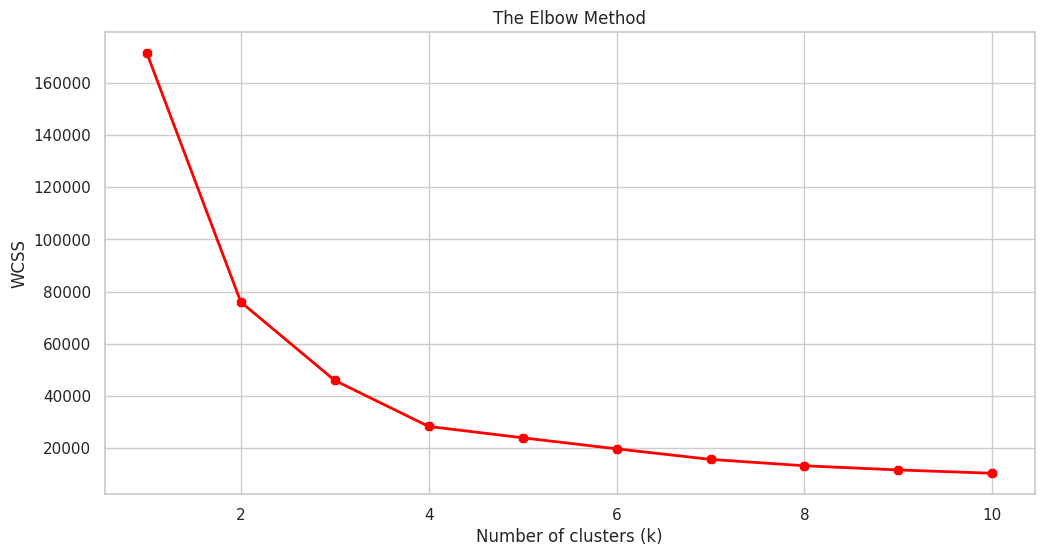

In [ ]:


# Assuming df is already defined with the required columns
x1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4) # You need to create a new KMeans object
label = kmeans.fit_predict(x1) # Make sure that you are using the correct variable name x1 (lowercase)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 3
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


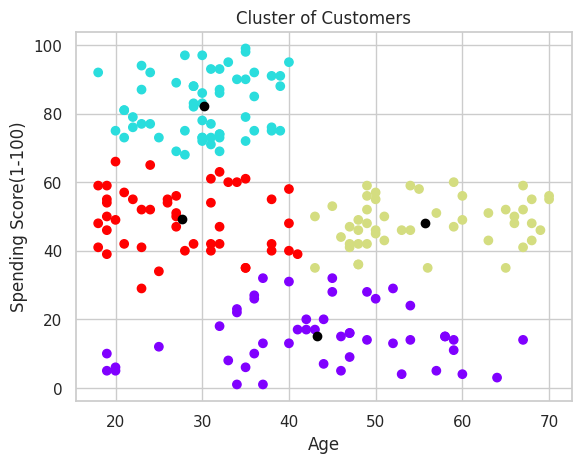

In [ ]:
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

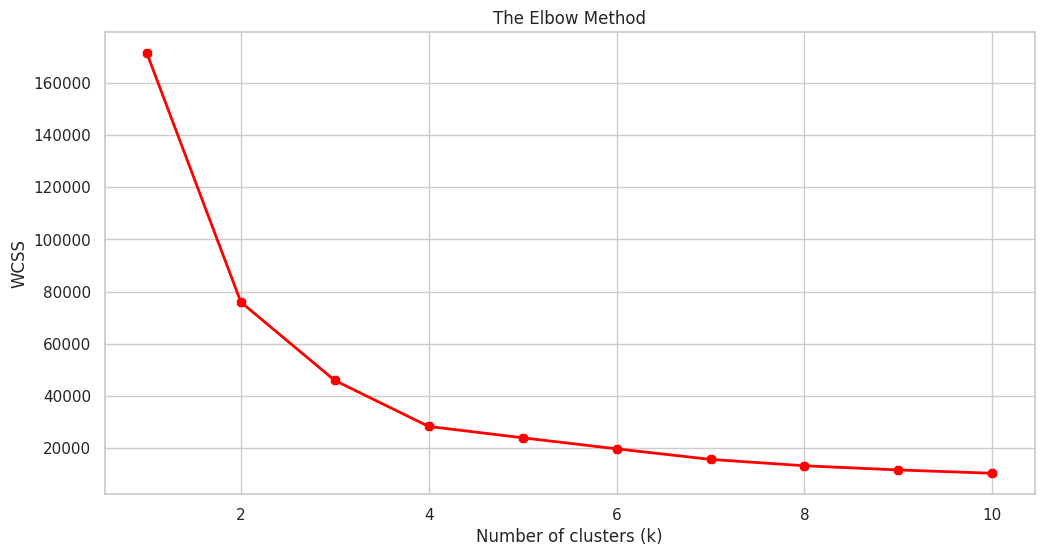

In [ ]:
# Assuming df is already defined with the required columns
x2 = df.loc[:, ["Age", "Spending Score (1-100)"]].values

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

In [ ]:
# Create a new KMeans object with n_clusters=5 (following from the Elbow Method)
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)

# Fit the model and predict the cluster labels for x1
label = kmeans.fit_predict(x1)

# Print the resulting cluster labels
print(label)


[2 0 3 0 2 0 3 0 3 0 3 0 3 0 3 0 1 2 1 0 1 0 3 0 3 0 1 2 1 0 3 0 3 0 3 0 3
 0 3 0 4 0 1 2 1 2 4 2 2 2 4 2 2 4 1 1 4 4 2 4 4 2 4 4 4 2 1 4 2 2 4 1 4 4
 4 2 1 1 2 1 4 2 4 1 2 1 4 2 2 1 4 2 1 1 2 2 1 2 1 2 2 1 4 2 4 2 4 4 4 4 4
 2 1 2 2 2 4 4 1 4 2 1 2 0 2 0 1 0 3 0 3 0 2 0 3 0 3 0 3 0 3 0 2 0 3 0 1 0
 3 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0 1 0 3 0 1 2 3 0 3 0 3 0 3 0 3 0 1 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 1 0 3 0]


In [ ]:
print(kmeans.cluster_centers_)

[[30.1754386  82.35087719]
 [44.96969697 39.15151515]
 [25.775      50.775     ]
 [43.1        12.2       ]
 [60.36666667 51.16666667]]


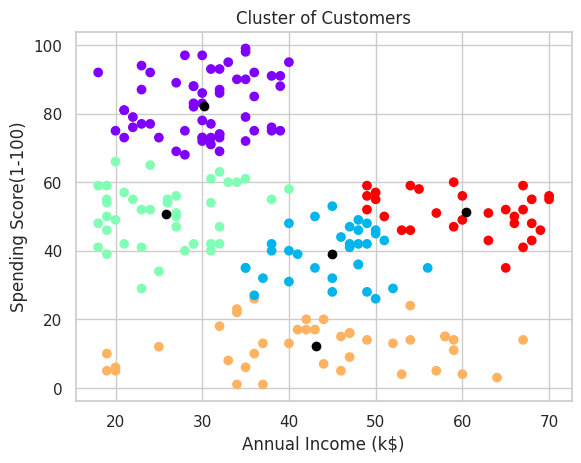

In [ ]:
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

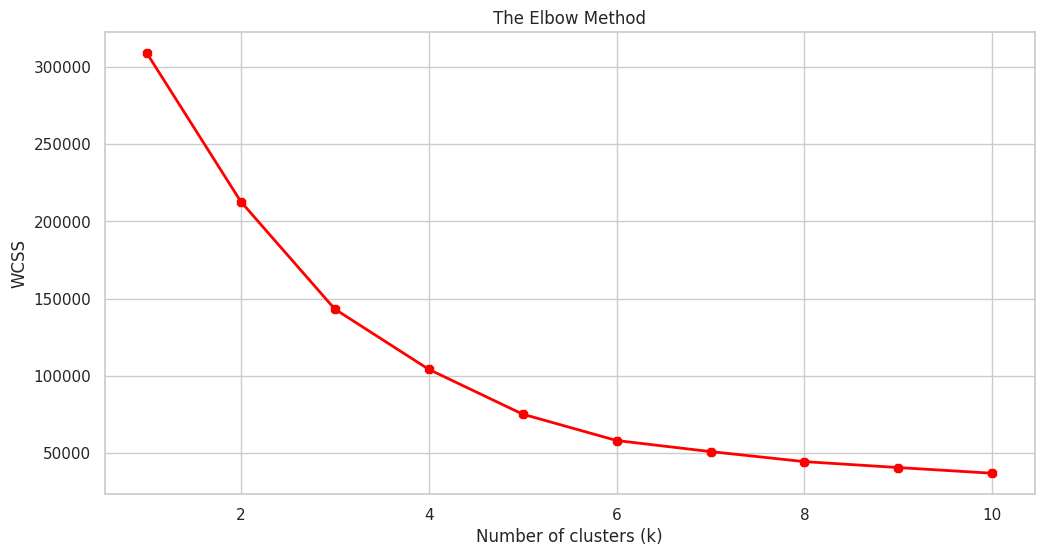

In [ ]:
x3=df.iloc[:,1:]

wcss=[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()


In [ ]:
# Apply KMeans with 5 clusters (consistent with code 1)
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)

# Fit and predict the cluster labels using x3
label = kmeans.fit_predict(x3)

# Print the resulting cluster labels
print(label)


[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [ ]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [32.69230769 86.53846154 82.12820513]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


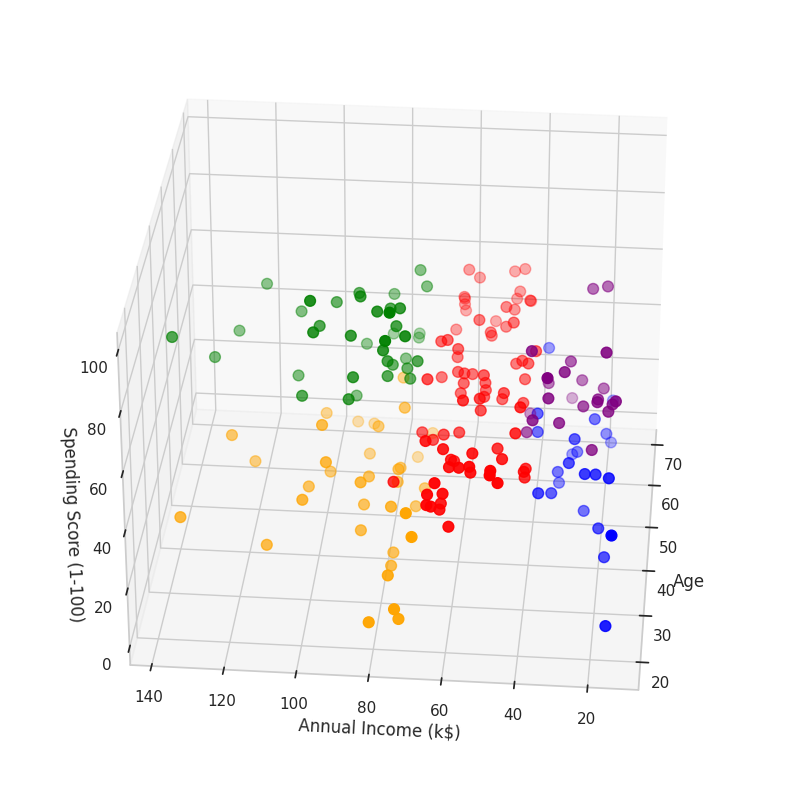

In [ ]:
clusters = kmeans.fit_predict(x3)
df['cluster'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.cluster == 0], df["Annual Income (k$)"][df.cluster == 0], df["Spending Score (1-100)"][df.cluster == 0], c='blue', s=60) # Use df.cluster to access the cluster labels
ax.scatter(df.Age[df.cluster == 1], df["Annual Income (k$)"][df.cluster == 1], df["Spending Score (1-100)"][df.cluster == 1], c='red', s=60)  # Use df.cluster to access the cluster labels
ax.scatter(df.Age[df.cluster == 2], df["Annual Income (k$)"][df.cluster == 2], df["Spending Score (1-100)"][df.cluster == 2], c='green', s=60) # Use df.cluster to access the cluster labels
ax.scatter(df.Age[df.cluster == 3], df["Annual Income (k$)"][df.cluster == 3], df["Spending Score (1-100)"][df.cluster == 3], c='orange', s=60) # Use df.cluster to access the cluster labels
ax.scatter(df.Age[df.cluster == 4], df["Annual Income (k$)"][df.cluster == 4], df["Spending Score (1-100)"][df.cluster == 4], c='purple', s=60) # Use df.cluster to access the cluster labels
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()